# Predicting Employee Termination

In [339]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# deactive future warnings
import warnings
warnings.simplefilter(action='ignore')

In [340]:
# import csv file and create dataframe
url = "https://raw.githubusercontent.com/theMarlonski/AppliedML_Assignments/main/1/MFG10YearTerminationData.csv"
df = pd.read_csv(url)

## EDA and Data Pre-Processing

In [341]:
# print number of rows and columns
print(df.shape)

(49653, 18)


In [342]:
# print first 5 rows
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [343]:
# print last 5 rows
df.tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


In [344]:
# check for duplicates
df.duplicated().sum()

0

In [345]:
# print column names
df.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [346]:
# print data types
df.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

In [347]:
# drop some unimportant columns
df = df.drop(['EmployeeID', 'recorddate_key', 'birthdate_key', 'gender_full'], axis=1)

In [348]:
# print summary statistics
df.describe()


,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000
mean,42.077035,10.434596,27.297605,2010.612612
std,12.427257,6.325286,13.514134,2.845577
min,19.000000,0.000000,1.000000,2006.000000
25%,31.000000,5.000000,16.000000,2008.000000
50%,42.000000,10.000000,28.000000,2011.000000
75%,53.000000,15.000000,42.000000,2013.000000
max,65.000000,26.000000,46.000000,2015.000000


In [349]:
# check for missing values
df.isnull().sum()

orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

In [350]:
# check for unique values
df.nunique()

orighiredate_key       4415
terminationdate_key    1055
age                      47
length_of_service        27
city_name                40
department_name          21
job_title                47
store_name               46
gender_short              2
termreason_desc           4
termtype_desc             3
STATUS_YEAR              10
STATUS                    2
BUSINESS_UNIT             2
dtype: int64

In [351]:
# check values of some columns
df.city_name.unique()

array(['Vancouver', 'Terrace', 'Nanaimo', 'Nelson', 'Kelowna', 'Victoria',
       'Kamloops', 'Fort St John', 'Surrey', 'Vernon', 'Quesnel',
       'Chilliwack', 'Dawson Creek', 'Squamish', 'New Westminster',
       'Port Coquitlam', 'Cortes Island', 'Burnaby', 'Bella Bella',
       'Cranbrook', 'Williams Lake', 'Trail', 'Prince George', 'Richmond',
       'Grand Forks', 'West Vancouver', 'Abbotsford', 'Aldergrove',
       'Langley', 'North Vancouver', 'White Rock', 'New Westminister',
       'Fort Nelson', 'Haney', 'Valemount', 'Ocean Falls', 'Princeton',
       'Dease Lake', 'Pitt Meadows', 'Blue River'], dtype=object)

In [352]:
df.department_name.unique()

array(['Executive', 'Store Management', 'Meats', 'Recruitment',
       'Training', 'Labor Relations', 'HR Technology', 'Employee Records',
       'Compensation', 'Legal', 'Produce', 'Accounts Receiveable',
       'Bakery', 'Information Technology', 'Accounts Payable', 'Audit',
       'Accounting', 'Investment', 'Dairy', 'Processed Foods',
       'Customer Service'], dtype=object)

In [353]:
df.job_title.unique()

array(['CEO', 'VP Stores', 'Legal Counsel', 'VP Human Resources',
       'VP Finance', 'Exec Assistant, VP Stores',
       'Exec Assistant, Legal Counsel', 'CHief Information Officer',
       'Store Manager', 'Meats Manager',
       'Exec Assistant, Human Resources', 'Exec Assistant, Finance',
       'Director, Recruitment', 'Director, Training',
       'Director, Labor Relations', 'Director, HR Technology',
       'Director, Employee Records', 'Director, Compensation',
       'Corporate Lawyer', 'Produce Manager',
       'Director, Accounts Receivable', 'Bakery Manager',
       'Systems Analyst', 'Director, Accounts Payable', 'Director, Audit',
       'Director, Accounting', 'Director, Investments', 'Dairy Person',
       'Recruiter', 'Processed Foods Manager', 'Customer Service Manager',
       'Trainer', 'Meat Cutter', 'Labor Relations Analyst',
       'Dairy Manager', 'HRIS Analyst', 'Benefits Admin',
       'Compensation Analyst', 'Accounts Receiveable Clerk',
       'Accounts Pay

In [354]:
sorted(df.store_name.unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46]

In [355]:
df.termreason_desc.unique()

array(['Not Applicable', 'Retirement', 'Resignaton', 'Layoff'],
      dtype=object)

In [356]:
df.termtype_desc.unique()

array(['Not Applicable', 'Voluntary', 'Involuntary'], dtype=object)

In [357]:
df.BUSINESS_UNIT.unique()

array(['HEADOFFICE', 'STORES'], dtype=object)

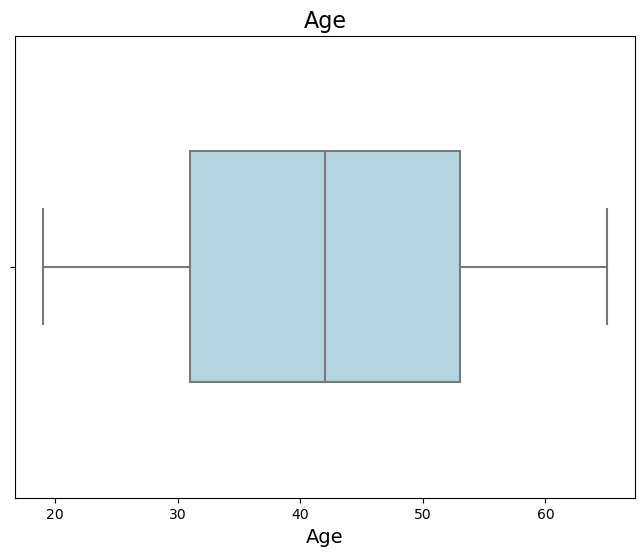

In [358]:
plt.figure(figsize=(8, 6))
sns.set_palette("Set3")
sns.despine()

# Create a boxplot for the age
sns.boxplot(x=df['age'], color='lightblue', width=0.5)
plt.xlabel('Age', fontsize=14)
plt.title('Age', fontsize=16)
plt.show()

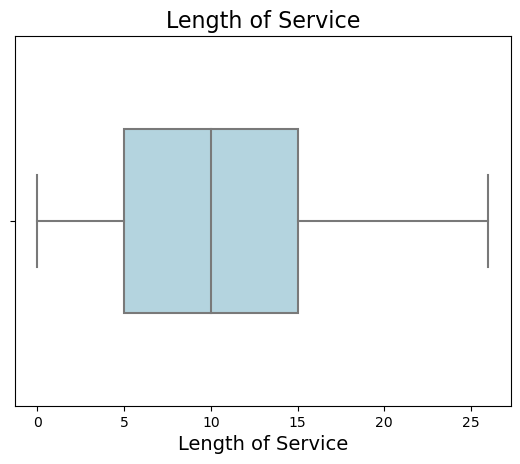

In [359]:
# Create a boxplot for the length of service
sns.boxplot(x=df['length_of_service'], color='lightblue', width=0.5)
plt.xlabel('Length of Service', fontsize=14)
plt.title('Length of Service', fontsize=16)
plt.show()

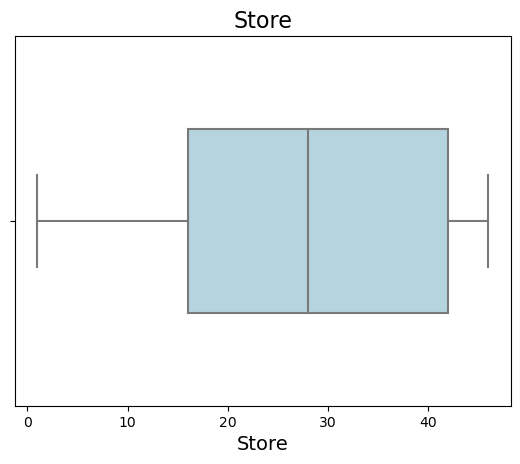

In [360]:
# Create a boxplot for the store name 
sns.boxplot(x=df['store_name'], color='lightblue', width=0.5)
plt.xlabel('Store', fontsize=14)
plt.title('Store', fontsize=16)
plt.show()

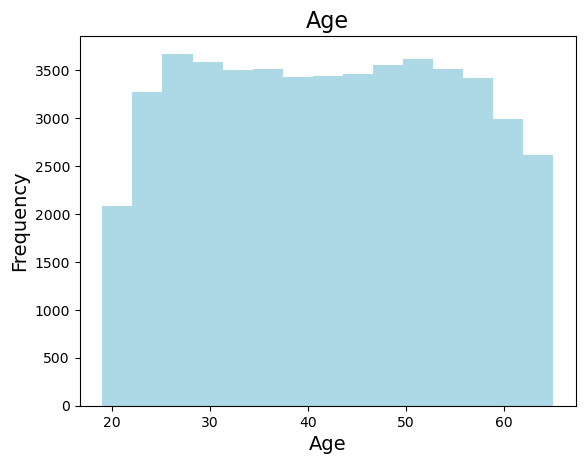

In [361]:
# Use different plots and visualizations to explore the data

# Create a histogram for the age
plt.hist(df['age'], bins=15, color='lightblue')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age', fontsize=16)
plt.show()


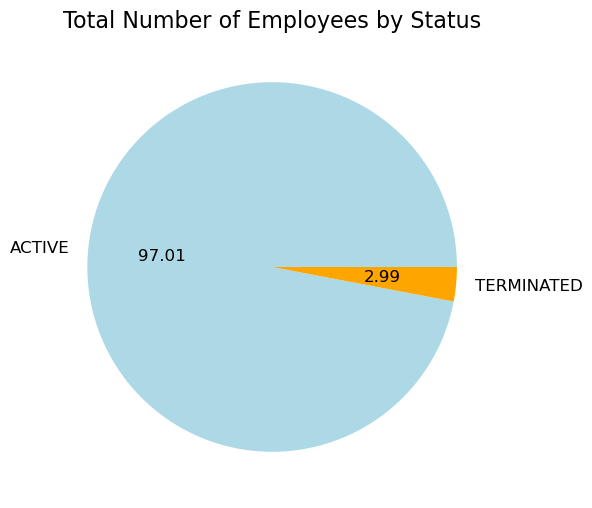

In [362]:
# pieplot for the total number of employees by status with blue color
df['STATUS'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6), fontsize=12, colors=['lightblue', 'orange'])
plt.title('Total Number of Employees by Status', fontsize=16)
# hide the y label
plt.ylabel('')
plt.show()

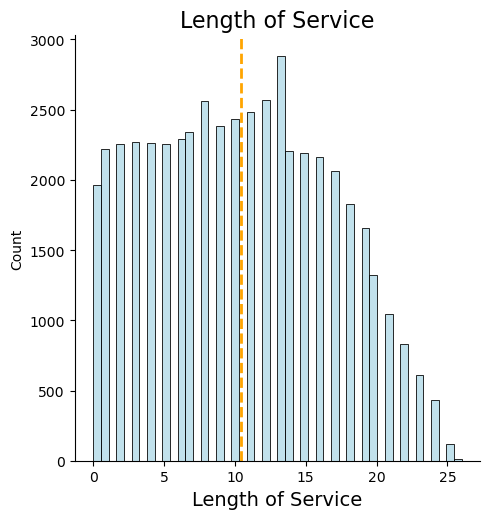

In [363]:
# bell curve for the length of service
sns.displot(df['length_of_service'], color='lightblue')
plt.xlabel('Length of Service', fontsize=14)
plt.title('Length of Service', fontsize=16)
# add distribution line
plt.axvline(df['length_of_service'].mean(), color='orange', linestyle='dashed', linewidth=2)
plt.show()

<Axes: >

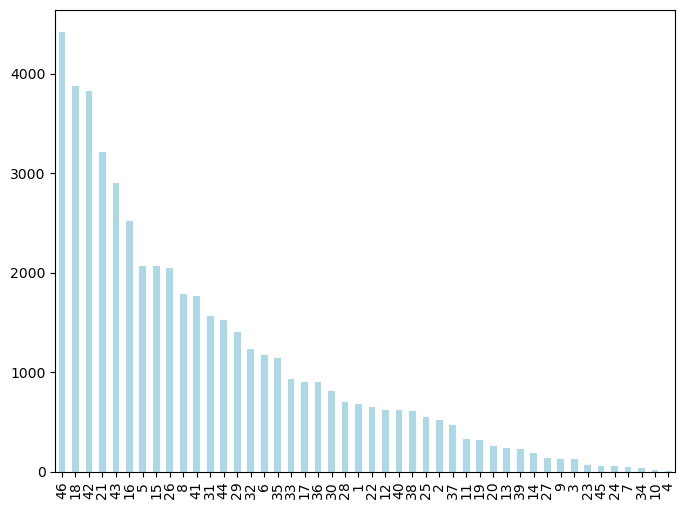

In [364]:
# barplot for the total number of employees by store
df['store_name'].value_counts().plot(kind='bar', figsize=(8, 6), color='lightblue')

Text(0.5, 0, 'Reason of Termination')

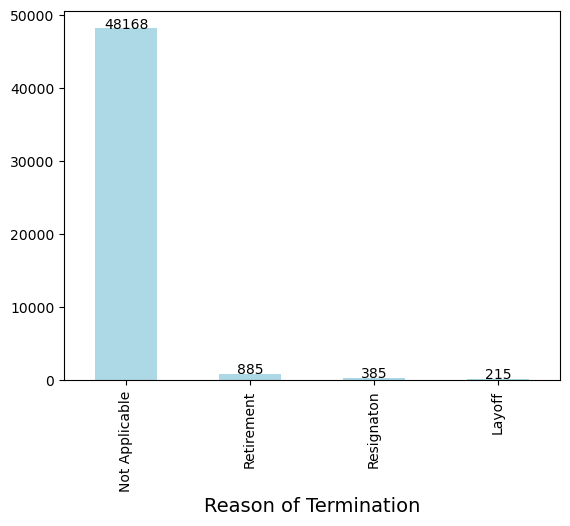

In [365]:
# Create a barplot for the reason of termination
df['termreason_desc'].value_counts().plot(kind='bar', color='lightblue')
# add number of observations to the bars
for i in range(len(df['termreason_desc'].value_counts())):
    plt.text(x=i, y=df['termreason_desc'].value_counts()[i], s=df['termreason_desc'].value_counts()[i], ha='center')

plt.xlabel('Reason of Termination', fontsize=14)

Text(0.5, 0, 'Type of Termination')

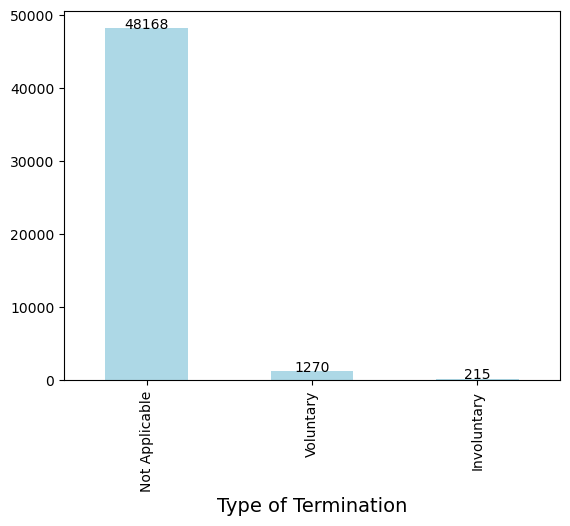

In [366]:
# Create a barplot for the type of termination
df['termtype_desc'].value_counts().plot(kind='bar', color='lightblue')
# add number of observations to the bars
for i in range(len(df['termtype_desc'].value_counts())):
    plt.text(x=i, y=df['termtype_desc'].value_counts()[i], s=df['termtype_desc'].value_counts()[i], ha='center')

plt.xlabel('Type of Termination', fontsize=14)

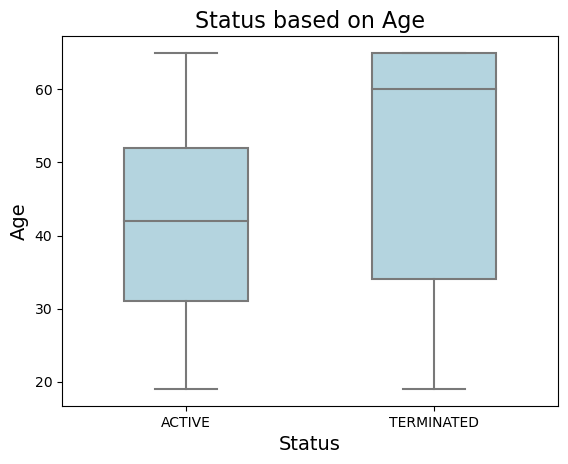

In [367]:

# Show distribution of status based on age
sns.boxplot(x=df['STATUS'], y=df['age'], color='lightblue', width=0.5)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Status based on Age', fontsize=16)
plt.show()


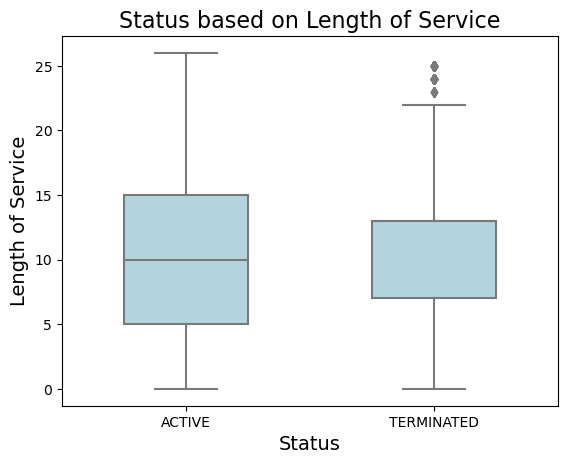

In [368]:
# Show distribution of status based on length of service
sns.boxplot(x=df['STATUS'], y=df['length_of_service'], color='lightblue', width=0.5)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Length of Service', fontsize=14)
plt.title('Status based on Length of Service', fontsize=16)
plt.show()

In [369]:
# df with active employees by job title
df_active = df[df['STATUS'] == 'ACTIVE']

# group by job title and count the number of employees
df_active.groupby('job_title')['STATUS'].count()

# df with terminated employees by job title
df_terminated = df[df['STATUS'] == 'TERMINATED']

# group by job title and count the number of employees
df_terminated.groupby('job_title')['STATUS'].count()

# join the two dataframes
df_active_terminated = pd.merge(df_active.groupby('job_title')['STATUS'].count(), df_terminated.groupby('job_title')['STATUS'].count(), on='job_title')

# rename columns
df_active_terminated.columns = ['Active', 'Terminated']

# create a new column with the total number of employees
df_active_terminated['Total'] = df_active_terminated['Active'] + df_active_terminated['Terminated']

# sort values by total number of employees
df_active_terminated = df_active_terminated.sort_values(by='Total', ascending=False)

# add a new column with the percentage of terminated employees
df_active_terminated['TerminationPercentage'] = round(df_active_terminated['Terminated'] / df_active_terminated['Total'] * 100, 2)

# print 
df_active_terminated

,Active,Terminated,Total,TerminationPercentage
job_title,,,,
Meat Cutter,9630,354,9984,3.55
Dairy Person,8400,190,8590,2.21
Produce Clerk,7905,332,8237,4.03
Baker,8005,91,8096,1.12
Cashier,6568,248,6816,3.64
Shelf Stocker,5548,74,5622,1.32
Customer Service Manager,292,14,306,4.58
Processed Foods Manager,273,16,289,5.54
Bakery Manager,264,21,285,7.37


In [370]:
# Show distribution of status based on business unit in a table
print(df.groupby(['BUSINESS_UNIT', 'STATUS']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()))

# Calculate proportion of statuses for each business unit
print(df.groupby(['BUSINESS_UNIT', 'STATUS']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()))

BUSINESS_UNIT  STATUS    
HEADOFFICE     ACTIVE        88.205128
               TERMINATED    11.794872
STORES         ACTIVE        97.114209
               TERMINATED     2.885791
dtype: float64
BUSINESS_UNIT  STATUS    
HEADOFFICE     ACTIVE        88.205128
               TERMINATED    11.794872
STORES         ACTIVE        97.114209
               TERMINATED     2.885791
dtype: float64


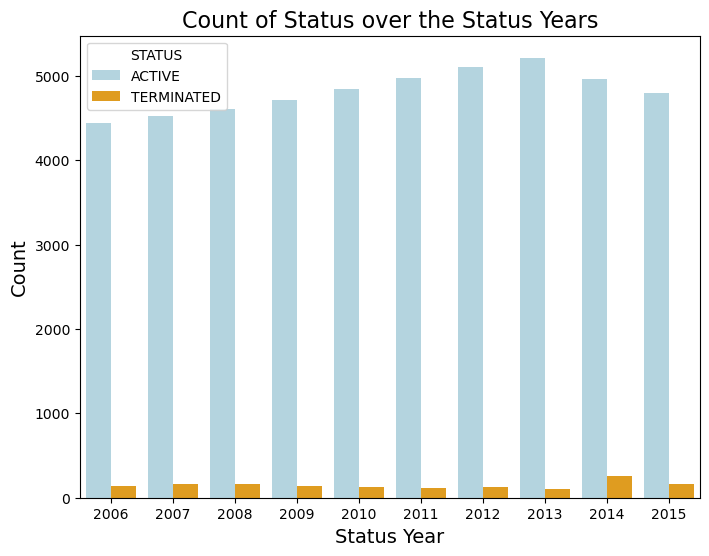

In [371]:
# Development of employee numbers over the years in blue and orange
# create palette in lightblue and orange
palette = ['lightblue', 'orange']

plt.figure(figsize=(8, 6))
sns.countplot(x="STATUS_YEAR", hue="STATUS", data=df, palette=palette)
plt.xlabel('Status Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Status over the Status Years', fontsize=16)
plt.show()


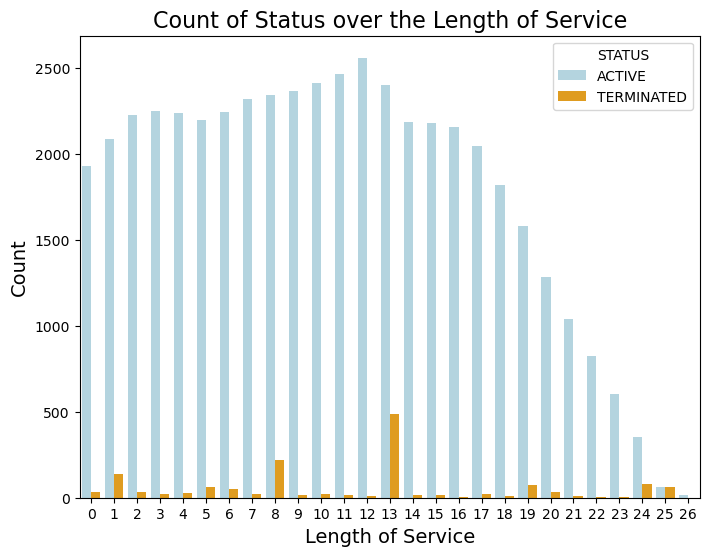

In [372]:
# Countplot of length of service regarding status to see if there is a pattern
plt.figure(figsize=(8, 6))
sns.countplot(x="length_of_service", hue="STATUS", data=df, palette=palette)
plt.xlabel('Length of Service', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Status over the Length of Service', fontsize=16)
plt.show()



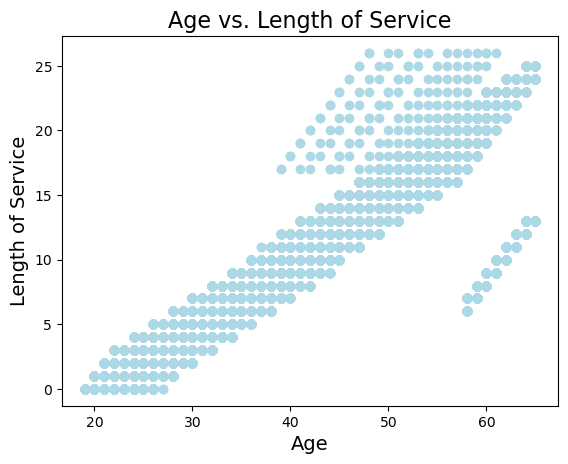

In [373]:
# create a scatterplot for "age" and "length_of_service"
plt.scatter(df['age'], df['length_of_service'], color='lightblue')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Length of Service', fontsize=14)
plt.title('Age vs. Length of Service', fontsize=16)
plt.show()

## Create numeric variables

In [374]:
df.columns

Index(['orighiredate_key', 'terminationdate_key', 'age', 'length_of_service',
       'city_name', 'department_name', 'job_title', 'store_name',
       'gender_short', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [375]:
# encode categorical variables

# import library
from sklearn.preprocessing import LabelEncoder

# create object
le = LabelEncoder()

# encode categorical variables
df['city_name'] = le.fit_transform(df['city_name']).astype('int64')
df['department_name'] = le.fit_transform(df['department_name']).astype('int64')
df['job_title'] = le.fit_transform(df['job_title']).astype('int64')
df['store_name'] = le.fit_transform(df['store_name']).astype('int64')
df['termreason_desc'] = le.fit_transform(df['termreason_desc']).astype('int64')
df['termtype_desc'] = le.fit_transform(df['termtype_desc']).astype('int64')
df['STATUS'] = le.fit_transform(df['STATUS']).astype('int64')
df['BUSINESS_UNIT'] = le.fit_transform(df['BUSINESS_UNIT']).astype('int64')
df["gender_short"] = le.fit_transform(df["gender_short"]).astype('int64')

# print first 5 rows
df.head()

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1/1/1900,52,17,34,9,7,34,1,1,1,2006,0,0
1,8/28/1989,1/1/1900,53,18,34,9,7,34,1,1,1,2007,0,0
2,8/28/1989,1/1/1900,54,19,34,9,7,34,1,1,1,2008,0,0
3,8/28/1989,1/1/1900,55,20,34,9,7,34,1,1,1,2009,0,0
4,8/28/1989,1/1/1900,56,21,34,9,7,34,1,1,1,2010,0,0


## Exclude "spoiler vars"

In [376]:
# exclude termreason_desc and termtype_desc as well as terminationdate_key and orighiredate_key
df = df.drop(['termreason_desc', 'termtype_desc', 'terminationdate_key', 'orighiredate_key', "STATUS_YEAR"], axis=1)

## Pattern Recognition

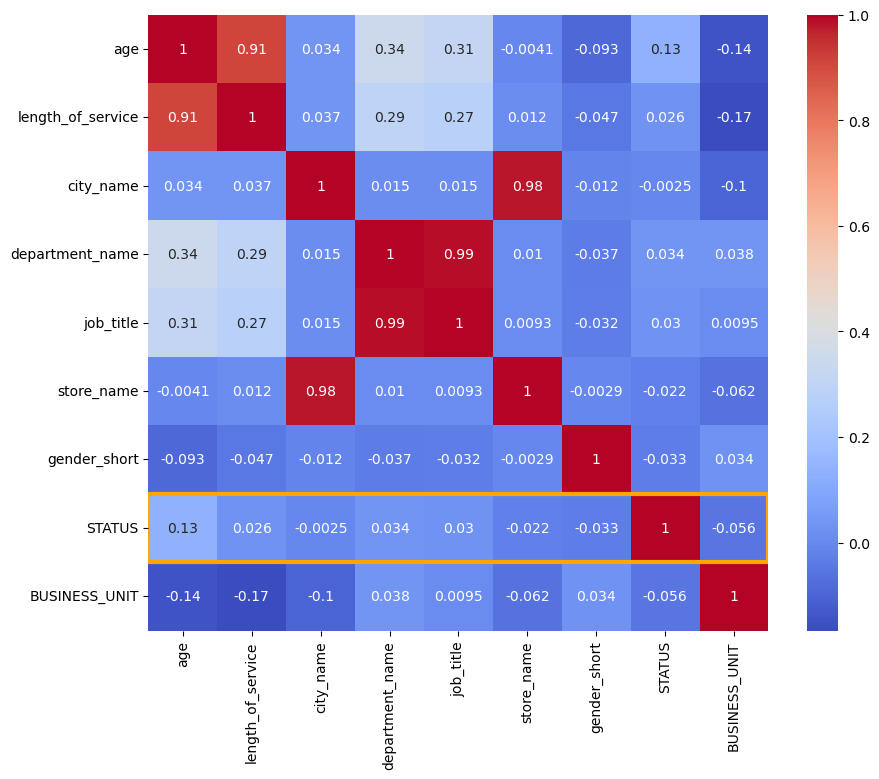

In [378]:
# create correlation matrix
corr = df.corr()
corr

# create plot showing different sized dots and color representing the correlation highlighting the STATUS column
plt.figure(figsize=(10, 8))
# create heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
# orange border around status column
plt.gca().add_patch(plt.Rectangle((0, 7), 9, 1, fill=False, edgecolor='orange', lw=3))
plt.show()


## Prediction

In [379]:
# handle class imbalance 
# encoding categorical variables 
# min-max scaling o.Ä. 
# feature selection
# train test split
# model training
# model evaluation




In [380]:
# create a model to predict the status of an employee

# import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### TRAIN AND TEST

In [381]:
# create X and y
X = df.drop('STATUS', axis=1)
y = df['STATUS']

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

### MinMax scaling

In [382]:

# create object
scaler = MinMaxScaler()

# fit and transform training data for age and length_of_service
X_train_scaled = scaler.fit_transform(X_train[['age', 'length_of_service']])

# transform test data for age and length_of_service
X_test_scaled = scaler.transform(X_test[['age', 'length_of_service']])

### Logistic regression

In [383]:
# create object
logreg = LogisticRegression()

# fit model
logreg.fit(X_train_scaled, y_train)

# make predictions
y_pred = logreg.predict(X_test_scaled)

# print accuracy score
print('Accuracy score of Logistic Regression model: ', accuracy_score(y_test, y_pred))

# print confusion matrix
print('Confusion matrix of Logistic Regression model: \n', confusion_matrix(y_test, y_pred))

# print classification report
print('Classification report of Logistic Regression model: \n', classification_report(y_test, y_pred))

Accuracy score of Logistic Regression model:  0.9700590762620838
Confusion matrix of Logistic Regression model: 
 [[14450     0]
 [  446     0]]
Classification report of Logistic Regression model: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     14450
           1       0.00      0.00      0.00       446

    accuracy                           0.97     14896
   macro avg       0.49      0.50      0.49     14896
weighted avg       0.94      0.97      0.96     14896



### Random forest

Accuracy score of Random Forest model:  0.9860365198711063


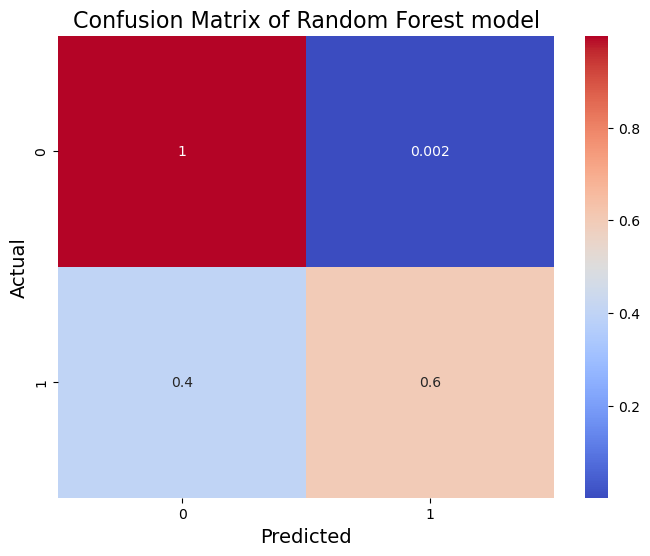

Classification report of Random Forest model: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     14450
           1       0.90      0.60      0.72       446

    accuracy                           0.99     14896
   macro avg       0.94      0.80      0.86     14896
weighted avg       0.99      0.99      0.98     14896



In [405]:
# create object
rf = RandomForestClassifier()

# fit model
rf.fit(X_train_scaled, y_train)

# make predictions
y_pred = rf.predict(X_test_scaled)

# print accuracy score
print('Accuracy score of Random Forest model: ', accuracy_score(y_test, y_pred))

# create plot for confusion matrix using percentages
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, cmap='coolwarm')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix of Random Forest model', fontsize=16)
plt.show()

# print classification report
print('Classification report of Random Forest model: \n', classification_report(y_test, y_pred))

#### Analysis of RF model

In [386]:
X

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,BUSINESS_UNIT
0,52,17,34,9,7,34,1,0
1,53,18,34,9,7,34,1,0
2,54,19,34,9,7,34,1,0
3,55,20,34,9,7,34,1,0
4,56,21,34,9,7,34,1,0
...,...,...,...,...,...,...,...,...
49648,21,2,33,7,14,33,1,1
49649,19,0,34,6,9,43,0,1
49650,21,2,38,6,9,38,0,1
49651,19,0,15,6,9,15,0,1


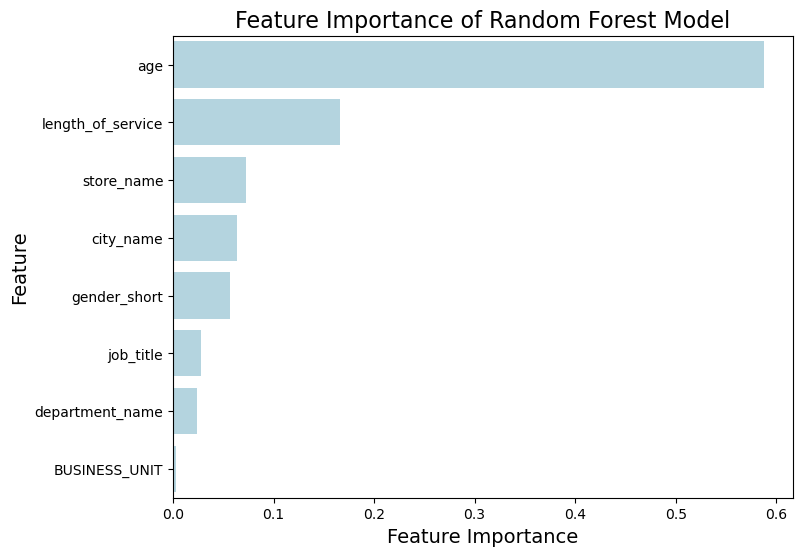

In [391]:
# get insights into random forest model predictions
# create object
rf = RandomForestClassifier()

# fit model
rf.fit(X_train, y_train)

# make predictions
y_pred = rf.predict(X_test)

# create dataframe with feature importance
df_feature_importance = pd.DataFrame({'feature': X.columns, 'feature_importance': rf.feature_importances_})

# sort values by feature importance
df_feature_importance = df_feature_importance.sort_values(by='feature_importance', ascending=False)

# print dataframe
df_feature_importance

# create a barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='feature_importance', y='feature', data=df_feature_importance, color='lightblue')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance of Random Forest Model', fontsize=16)
plt.show()

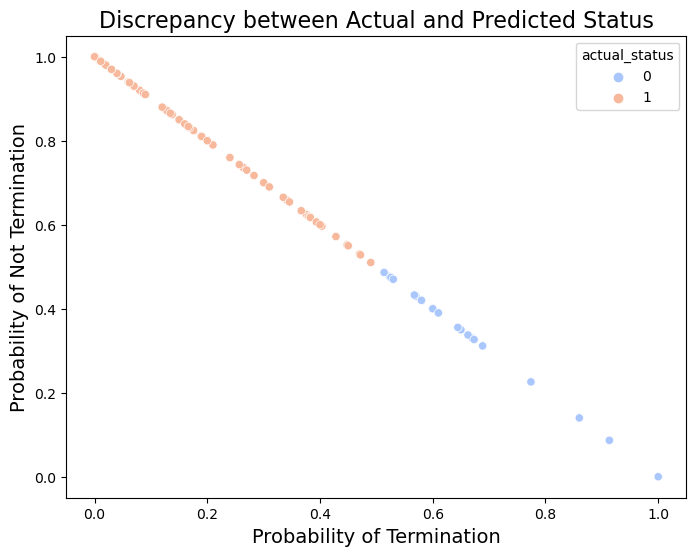

In [401]:
# understand the predictions of the random forest model and its confidence
predicted_probabilities = rf.predict_proba(X_test)

# create dataframe with predicted probabilities
df_predicted_probabilities = pd.DataFrame(predicted_probabilities, columns=['prob_not_terminated', 'prob_terminated'])

# add actual status
df_predicted_probabilities['actual_status'] = y_test.values

# add predicted status
df_predicted_probabilities['predicted_status'] = y_pred

# print dataframe
df_predicted_probabilities

# understand confidence in wrong predictions
# create dataframe with wrong predictions
df_wrong_predictions = df_predicted_probabilities[df_predicted_probabilities['actual_status'] != df_predicted_probabilities['predicted_status']]
df_wrong_predictions

# plot discrepancy between actual and predicted status using the confidence of the model
plt.figure(figsize=(8, 6))
sns.scatterplot(x='prob_terminated', y='prob_not_terminated', data=df_wrong_predictions, hue='actual_status', palette='coolwarm')
plt.xlabel('Probability of Termination', fontsize=14)
plt.ylabel('Probability of Not Termination', fontsize=14)
plt.title('Discrepancy between Actual and Predicted Status', fontsize=16)
plt.show()


Why use a RF in comparison to other models?

1. High Predictive Accuracy:

- Random Forest Model: The Random Forest model excels in delivering high predictive accuracy due to its ensemble learning approach, where multiple decision trees collectively contribute to the final prediction. This ensemble technique significantly reduces overfitting and enhances model performance, leading to more accurate predictions of employee attrition.

- Alternative Models: Linear models like Logistic Regression or simple Decision Trees may struggle to capture the complex and non-linear relationships present in employee attrition data, resulting in lower predictive accuracy compared to Random Forest.

2. Robustness and Versatility:

- Random Forest Model: Random Forest is robust to outliers and noisy data, making it an excellent choice for real-world datasets where data quality can vary. Additionally, it handles both numerical and categorical data effectively, providing versatility in feature selection and utilization.
- Alternative Models: Some models, such as Logistic Regression, may be sensitive to outliers or assumptions of linearity, limiting their robustness and applicability to diverse data types.

3. Feature Importance Analysis:

- Random Forest Model: Random Forest allows for easy assessment of feature importance, providing valuable insights into the factors influencing employee attrition. HR teams can use this information to target specific areas for improvement and formulate targeted retention strategies.
- Alternative Models: While feature importance analysis is possible in various models, the Random Forest's ensemble nature often yields more comprehensive and accurate insights, aiding better decision-making.

4. Handling Imbalanced Data:

- Random Forest Model: Employee attrition datasets typically exhibit class imbalance, with fewer instances of attrition compared to non-attrition. Random Forest handles this imbalance effectively by providing balanced predictions, minimizing the risk of biased results towards the majority class.
- Alternative Models: Some models may require additional techniques (e.g., oversampling, undersampling) to handle imbalanced data adequately, adding complexity to the prediction process.